In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("used_cars_data.csv")

In [3]:
data.shape

(7253, 14)

In [4]:
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [5]:
data.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [7]:
data.nunique()

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
New_Price             625
Price                1373
dtype: int64

In [8]:
data.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [9]:
(data.isnull().sum()/len(data))*100

S.No.                 0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.634220
Power                 0.634220
Seats                 0.730732
New_Price            86.129877
Price                17.013650
dtype: float64

In [10]:
# Removing the S.No column assuming it has no predictive
# power
data = data.drop(['S.No.'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


In [11]:
from datetime import date
date.today().year
data['Car_Age']=date.today().year-data['Year']
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,14
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,9
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,13
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,12
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,11


In [12]:
data['Brand']=data.Name.str.split().str.get(0)
data['Model']=data.Name.str.split().str.get(1) + data.Name.str.split().str.get(2)
data[['Name','Brand','Model']]

,Name,Brand,Model
0,Maruti Wagon R LXI CNG,Maruti,WagonR
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Creta1.6
2,Honda Jazz V,Honda,JazzV
3,Maruti Ertiga VDI,Maruti,ErtigaVDI
4,Audi A4 New 2.0 TDI Multitronic,Audi,A4New
...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Volkswagen,VentoDiesel
7249,Volkswagen Polo GT TSI,Volkswagen,PoloGT
7250,Nissan Micra Diesel XV,Nissan,MicraDiesel
7251,Volkswagen Polo GT TSI,Volkswagen,PoloGT


In [13]:
print(data.Brand.unique())

['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini' 'Hindustan' 'OpelCorsa']


In [14]:
print(data.Brand.nunique())

33


In [15]:
searchfor = ['Isuzu', 'ISUZU', 'Mini', 'Land']
data[data.Brand.str.contains('|'.join(searchfor))].head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model
13,Land Rover Range Rover 2.2L Pure,Delhi,2014,72000,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,27.00,10,Land,RoverRange
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.0 kmpl,2179 CC,115 bhp,5.0,NaN,17.50,12,Land,RoverFreelander
176,Mini Countryman Cooper D,Jaipur,2017,8525,Diesel,Automatic,Second,16.6 kmpl,1998 CC,112 bhp,5.0,NaN,23.00,7,Mini,CountrymanCooper
191,Land Rover Range Rover 2.2L Dynamic,Coimbatore,2018,36091,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,55.76,6,Land,RoverRange
228,Mini Cooper Convertible S,Kochi,2017,26327,Petrol,Automatic,First,16.82 kmpl,1998 CC,189.08 bhp,4.0,44.28 Lakh,35.67,7,Mini,CooperConvertible
311,Land Rover Range Rover HSE Dynamic,Delhi,2017,44000,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,44.00,7,Land,RoverRange
365,Mini Clubman Cooper S,Pune,2017,8350,Petrol,Manual,First,13.8 kmpl,1998 CC,192 bhp,5.0,44.59 Lakh,35.00,7,Mini,ClubmanCooper
391,Mini Cooper Convertible 1.6,Bangalore,2015,20000,Petrol,Automatic,First,18.86 kmpl,1598 CC,122 bhp,4.0,NaN,32.00,9,Mini,CooperConvertible
399,Land Rover Range Rover 2.2L Dynamic,Hyderabad,2012,56000,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,30.00,12,Land,RoverRange
404,Land Rover Range Rover 2.2L Prestige,Coimbatore,2017,34990,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,53.83,7,Land,RoverRange


In [16]:
data['Brand'].replace({'ISUZU':'Isuzu','Mini':'Mini Cooper','Land':'Land Rover'}, inplace=True)

In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.0,2014.00,2016.00,2019.0
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.0,53416.00,73000.00,6500000.0
Seats,7200.0,5.279722,0.811660,0.00,5.0,5.00,5.00,10.0
Price,6019.0,9.479468,11.187917,0.44,3.5,5.64,9.95,160.0
Car_Age,7253.0,10.634634,3.254421,5.00,8.0,10.00,13.00,28.0


In [18]:
data.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251,450,17.0 kmpl,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7207,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Power,7207,386,74 bhp,280,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
cat_cols=data.select_dtypes(include=['object']).columns
num_cols=data.select_dtypes(include=np.number).columns.tolist()
print('Categorical Variables')
print(cat_cols)
print('Numerical variables')
print(num_cols)

Categorical Variables
Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'New_Price', 'Brand', 'Model'],
      dtype='object')
Numerical variables
['Year', 'Kilometers_Driven', 'Seats', 'Price', 'Car_Age']


Year
Skew : -0.84


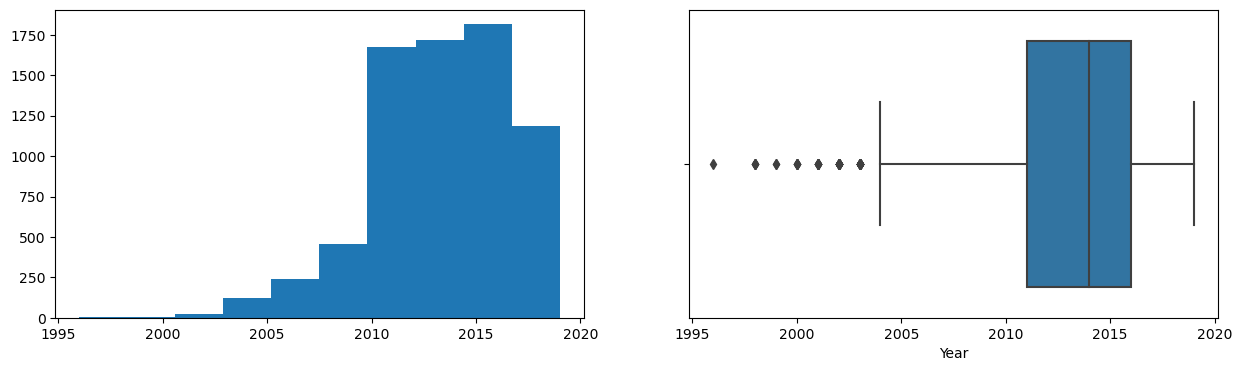

Kilometers_Driven
Skew : 61.58


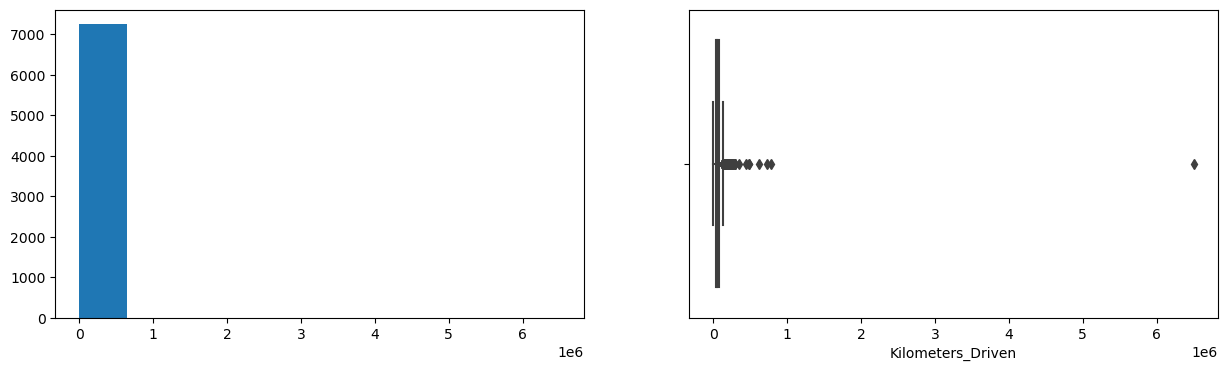

Seats
Skew : 1.9


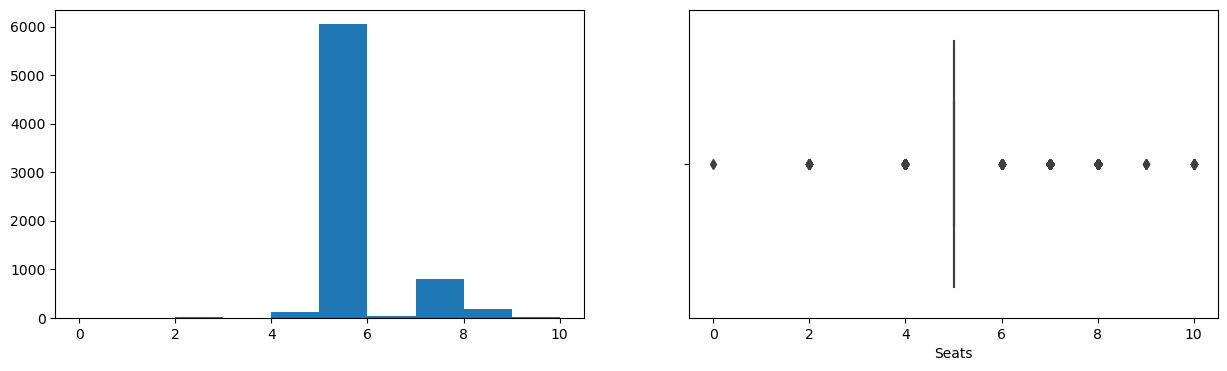

Price
Skew : 3.34


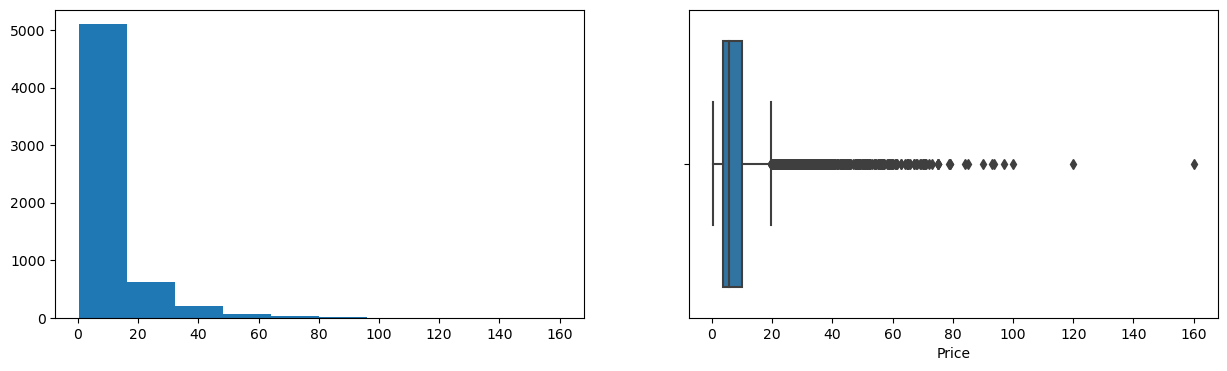

Car_Age
Skew : 0.84


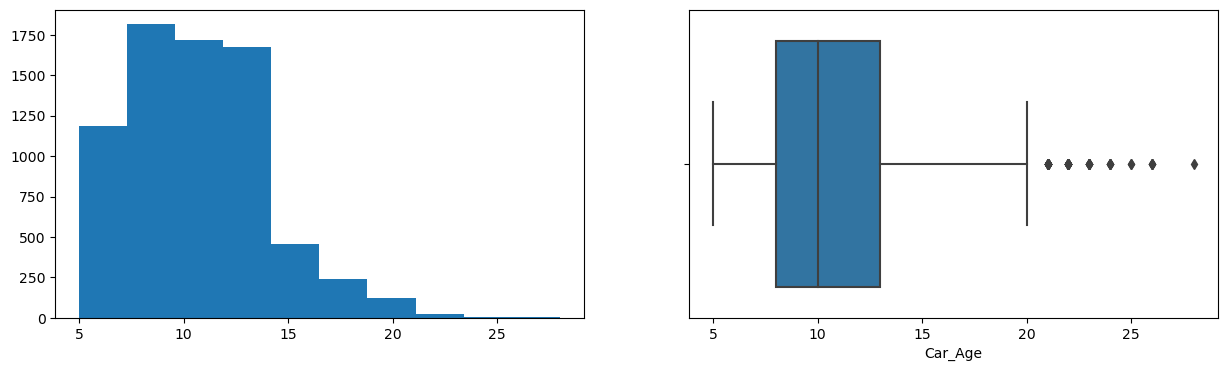

In [20]:
for col in num_cols:
    print(col)
    print('Skew :',round(data[col].skew(),2))
    plt.figure(figsize = (15,4))
    plt.subplot(1,2,1)
    data[col].hist(grid=False)
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.show()

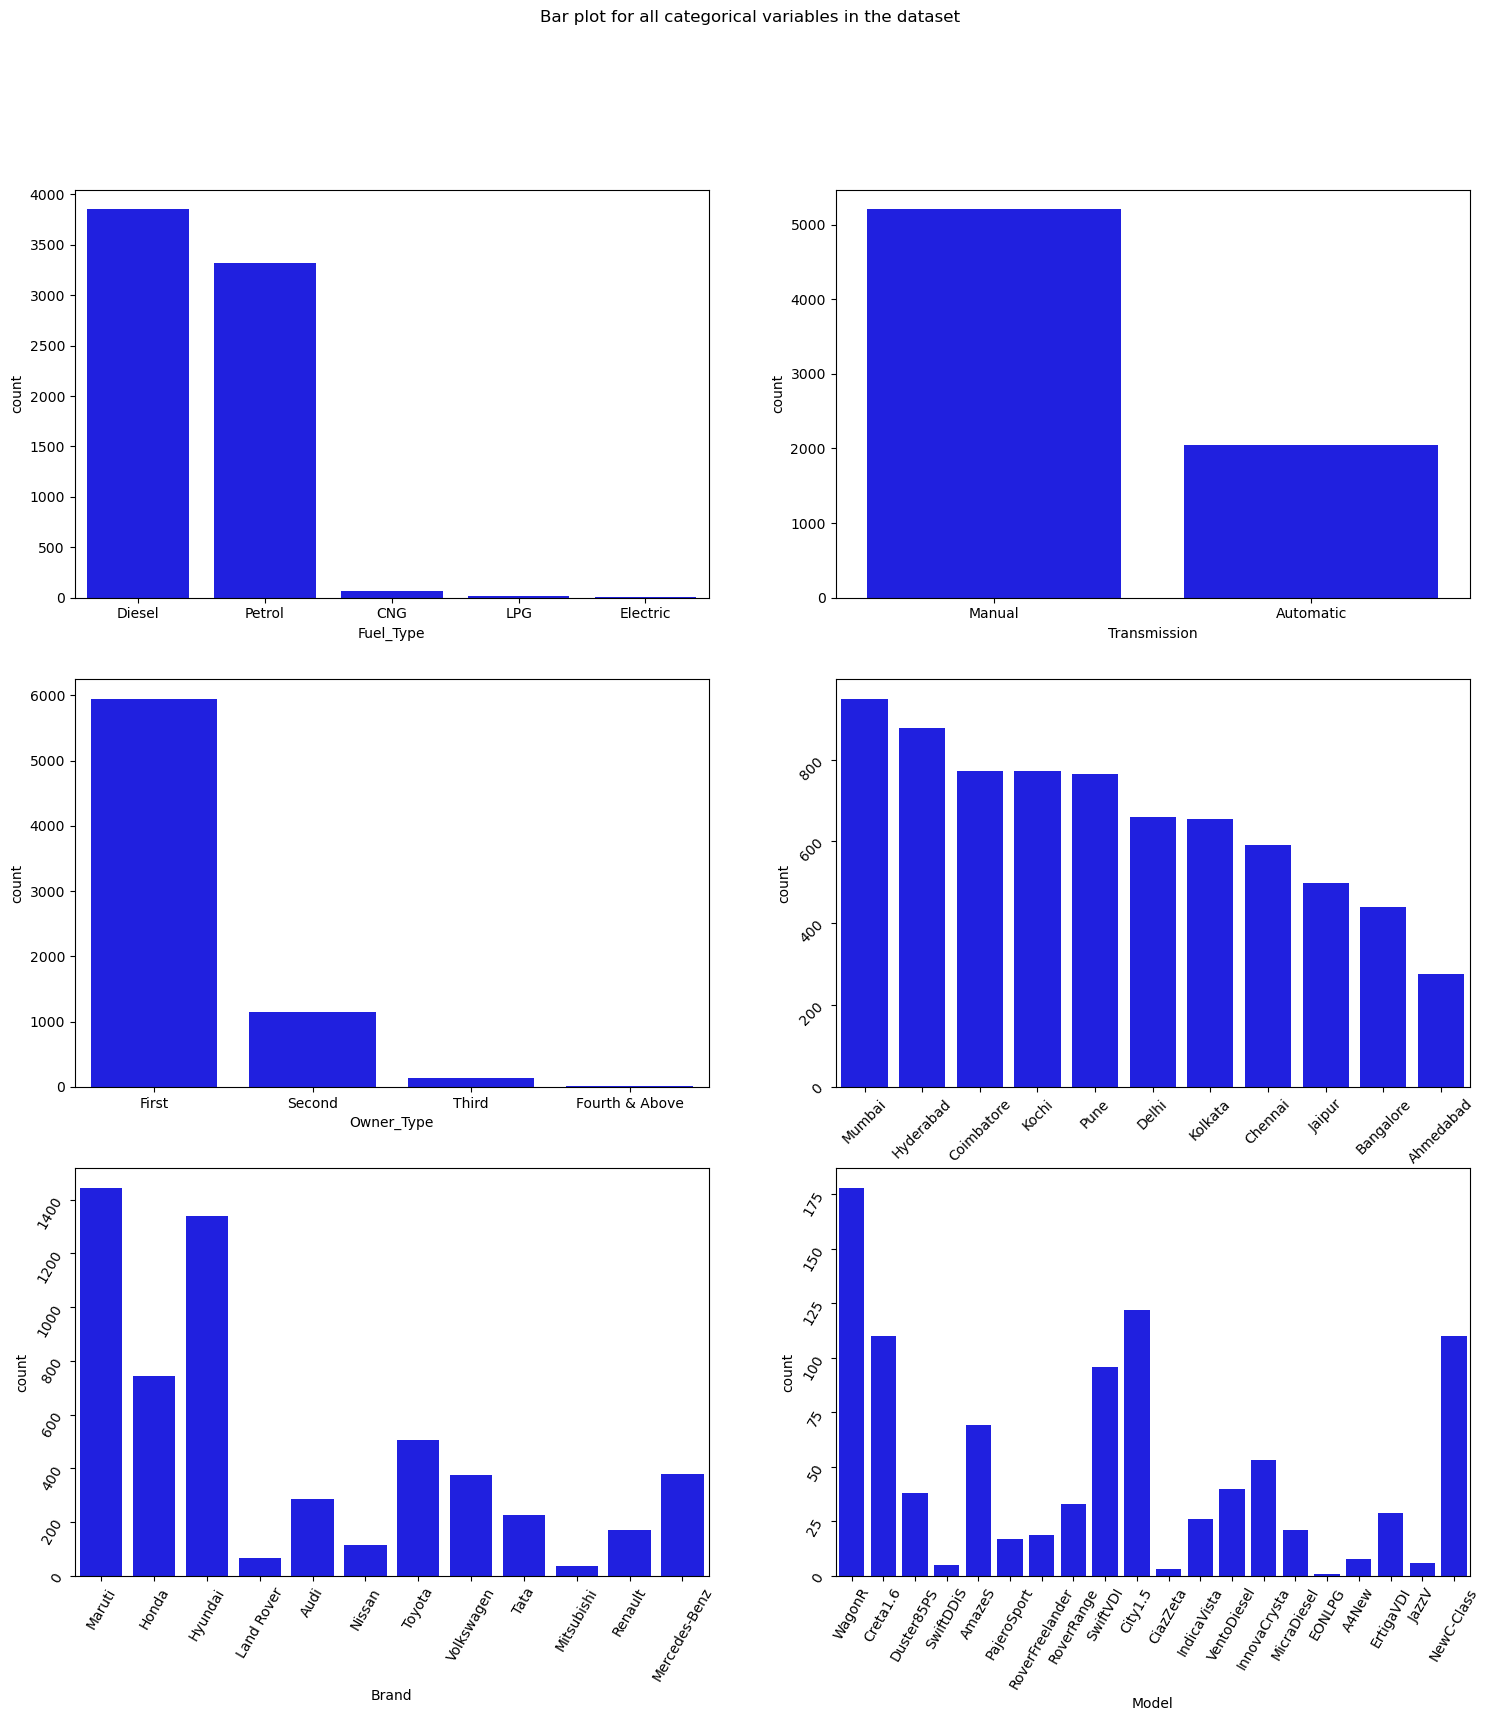

In [21]:
fig, axes = plt.subplots(3,2,figsize=(18,18))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax=axes[0,0], x = 'Fuel_Type', data = data, color = 'blue', order = data['Fuel_Type'].value_counts().index);
sns.countplot(ax=axes[0,1], x='Transmission', data = data, color = 'blue', order = data['Transmission'].value_counts().index);
sns.countplot(ax=axes[1,0], x = 'Owner_Type', data = data, color = 'blue', order = data['Owner_Type'].value_counts().index);
sns.countplot(ax=axes[1,1], x = 'Location', data = data, color = 'blue', order = data['Location'].value_counts().index);
sns.countplot(ax=axes[2,0], x = 'Brand', data = data, color = 'blue', order = data['Brand'].head(20).value_counts().index);
sns.countplot(ax=axes[2,1], x = 'Model', data = data, color = 'blue', order = data['Model'].head(20).value_counts().index);
axes[1][1].tick_params(labelrotation=45);
axes[2][0].tick_params(labelrotation=60);
axes[2][1].tick_params(labelrotation=60);

In [22]:
# Function for log transformation of column
def log_transform(data, col):
    for colname in col:
        if(data[colname]==1.0).all():
            data[colname + '_log'] = np.log(data[colname]+1)
        else:
            data[colname + '_log'] = np.log(data[colname])
    data.info()

In [23]:
log_transform(data, ['Kilometers_Driven','Price'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   7253 non-null   object 
 1   Location               7253 non-null   object 
 2   Year                   7253 non-null   int64  
 3   Kilometers_Driven      7253 non-null   int64  
 4   Fuel_Type              7253 non-null   object 
 5   Transmission           7253 non-null   object 
 6   Owner_Type             7253 non-null   object 
 7   Mileage                7251 non-null   object 
 8   Engine                 7207 non-null   object 
 9   Power                  7207 non-null   object 
 10  Seats                  7200 non-null   float64
 11  New_Price              1006 non-null   object 
 12  Price                  6019 non-null   float64
 13  Car_Age                7253 non-null   int64  
 14  Brand                  7253 non-null   object 
 15  Mode

<Axes: xlabel='Kilometres_Driven_log', ylabel='Density'>

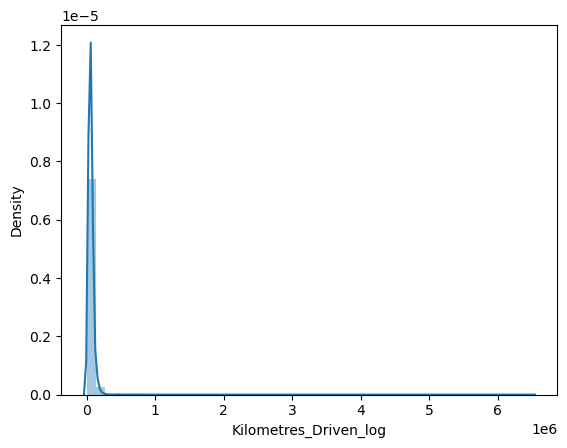

In [24]:
#log transformatino of the feature 'Kilometres driven'
sns.distplot(data['Kilometers_Driven'], axlabel="Kilometres_Driven_log")


<Axes: xlabel='Price', ylabel='Density'>

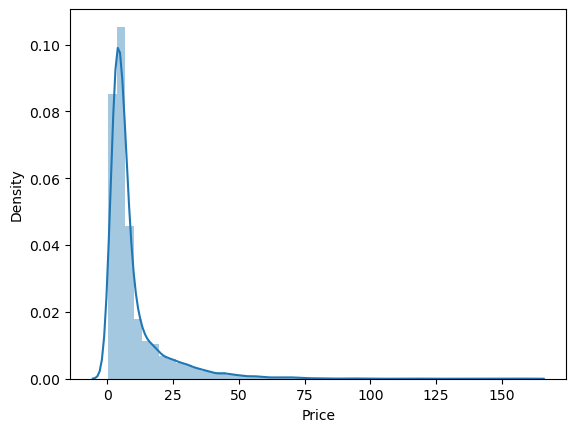

In [25]:
sns.distplot(data['Price'],axlabel='Price')

<Figure size 1300x1700 with 0 Axes>

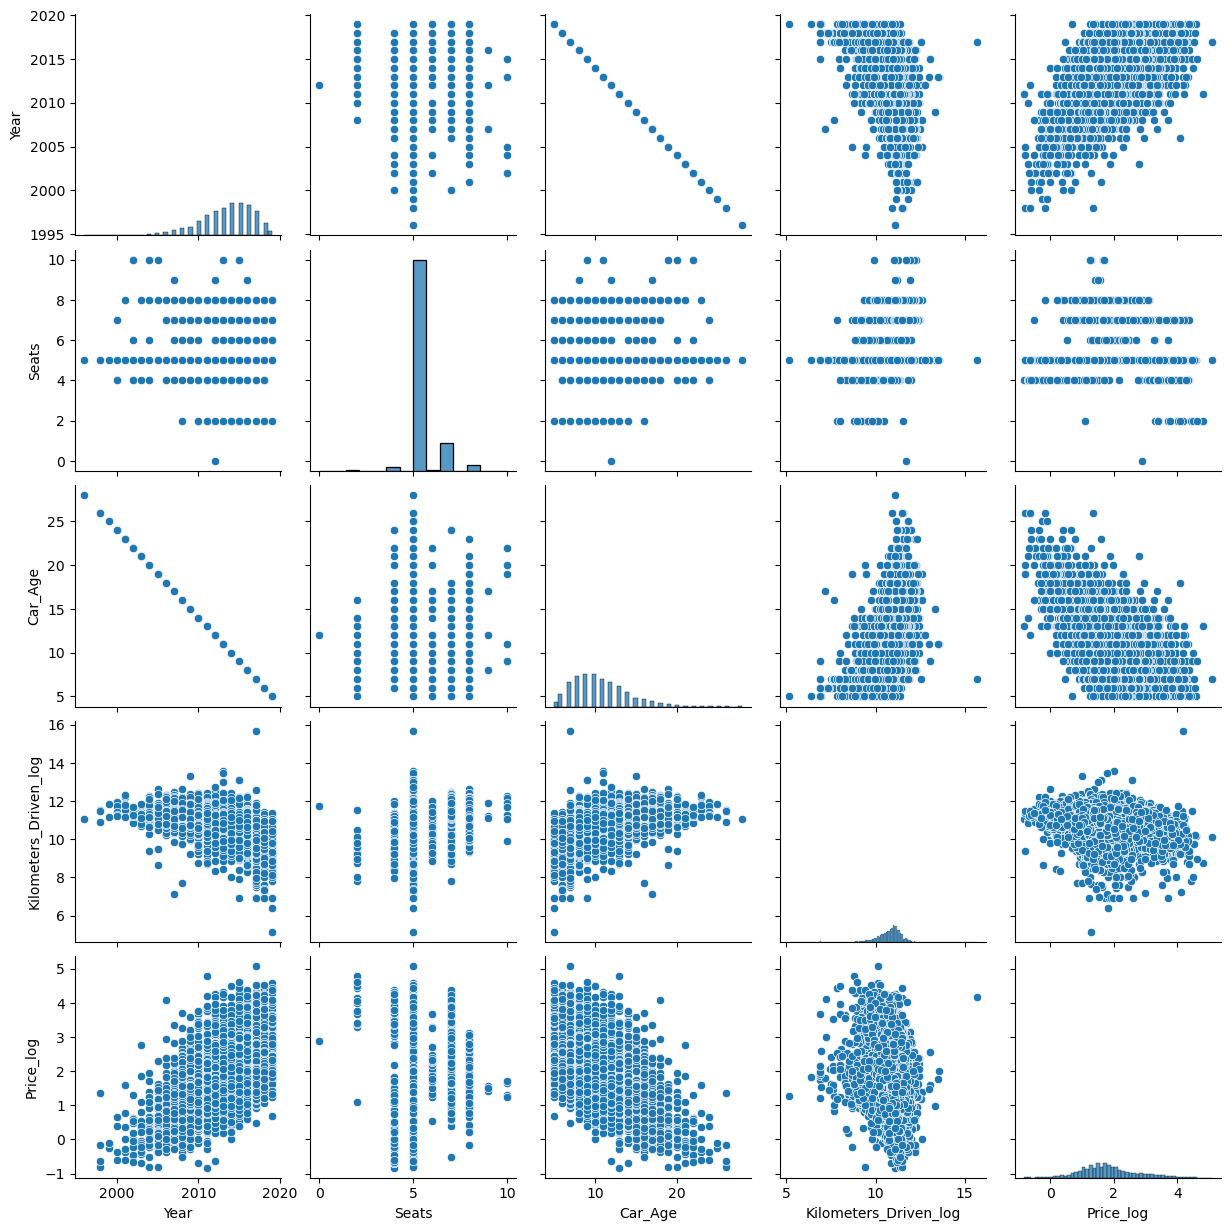

In [26]:
plt.figure(figsize=(13,17))
sns.pairplot(data=data.drop(['Kilometers_Driven','Price'],axis=1))
plt.show()

In [27]:
data.keys()

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price', 'Car_Age', 'Brand', 'Model',
       'Kilometers_Driven_log', 'Price_log'],
      dtype='object')

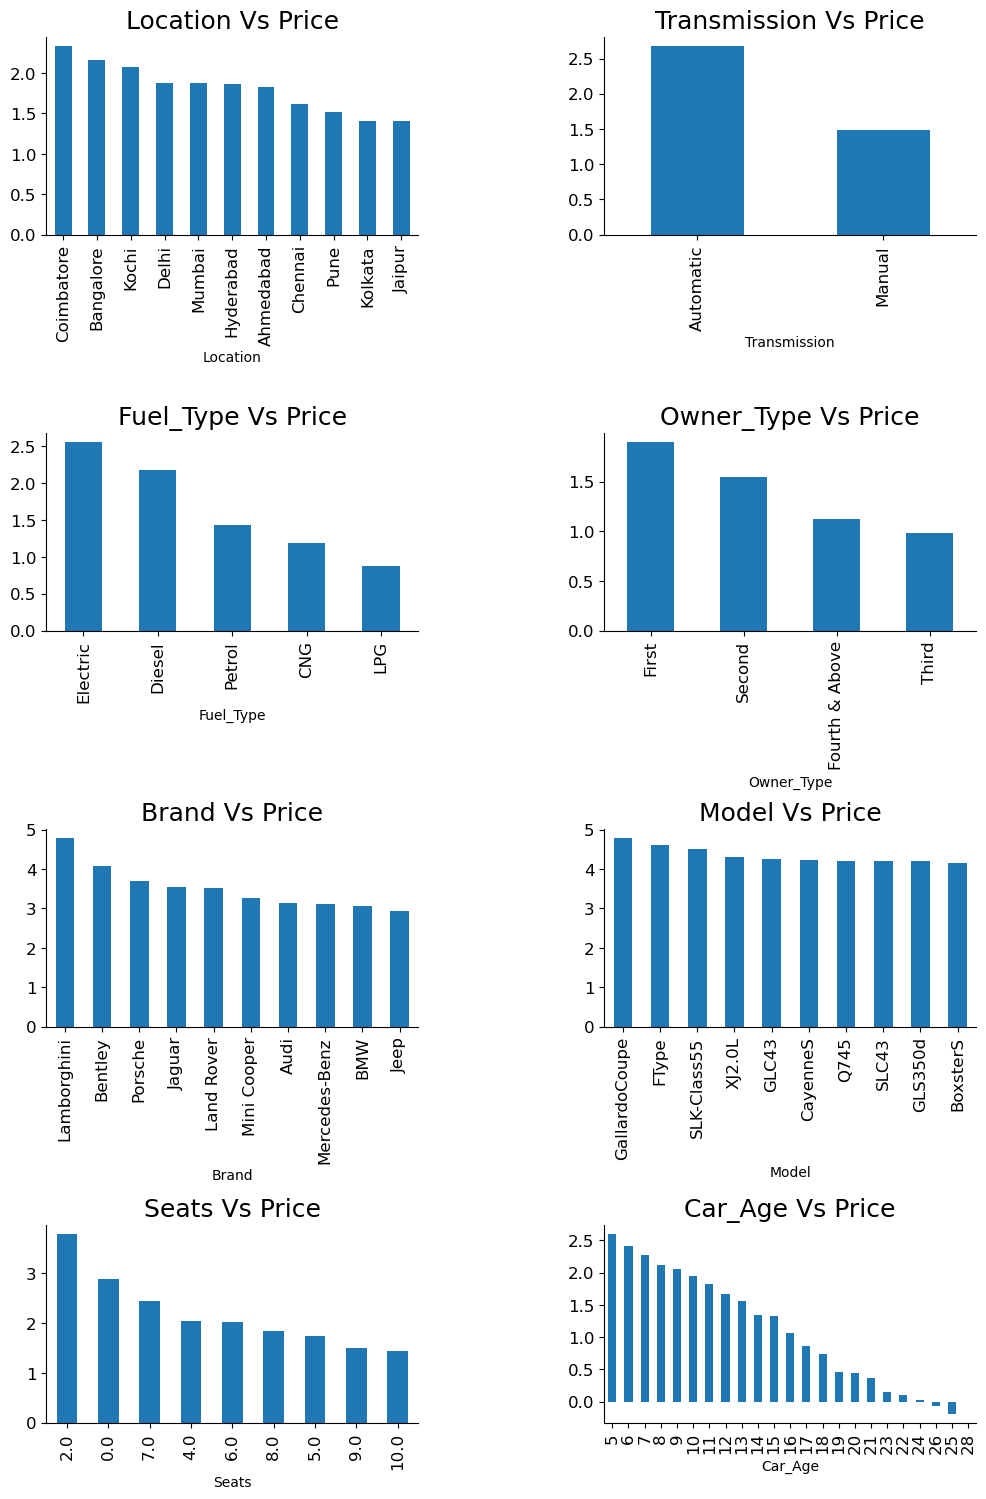

In [28]:
fig, axarr = plt.subplots(4,2,figsize=(12,18))
data.groupby('Location')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0],fontsize=12)
axarr[0][0].set_title("Location Vs Price", fontsize=18)
data.groupby('Transmission')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1],fontsize=12)
axarr[0][1].set_title("Transmission Vs Price", fontsize=18)
data.groupby('Fuel_Type')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][0],fontsize=12)
axarr[1][0].set_title("Fuel_Type Vs Price", fontsize=18)
data.groupby('Owner_Type')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][1],fontsize=12)
axarr[1][1].set_title("Owner_Type Vs Price", fontsize=18)
data.groupby('Brand')['Price_log'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][0],fontsize=12)
axarr[2][0].set_title("Brand Vs Price", fontsize=18)
data.groupby('Model')['Price_log'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][1],fontsize=12)
axarr[2][1].set_title("Model Vs Price", fontsize=18)
data.groupby('Seats')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][0],fontsize=12)
axarr[3][0].set_title("Seats Vs Price", fontsize=18)
data.groupby('Car_Age')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][1],fontsize=12)
axarr[3][1].set_title("Car_Age Vs Price", fontsize=18)
plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
sns.despine()

In [29]:
data.Mileage.str.contains('km/kg').sum() + data.Mileage.str.contains('kmpl').sum()

7251

In [30]:
#count = 0
new_mileage =[]# creating a new list to hold numerical values of mileage

for i in data.Mileage: #for loop to fill list new_mileage
    if(str(i).endswith('km/kg')):
        i = i[:-6]
        new_mileage.append(float(i)*1.40)
    elif(str(i).endswith('kmpl')):
        new_mileage.append(i[:-5])
    else:
        new_mileage.append(np.nan)

In [31]:
new_mileage[0]#checking for correct conversion of value 26.6 x 1.4 = 37.24

37.24

In [32]:
data['New Mileage'] = pd.Series(new_mileage) # converting list to Series and adding it to DataFrame

In [33]:
data[['Mileage', 'New Mileage']] #comparing values of Mileage and New Mileage
#data['Mileage'].info().sum()

,Mileage,New Mileage
0,26.6 km/kg,37.24
1,19.67 kmpl,19.67
2,18.2 kmpl,18.2
3,20.77 kmpl,20.77
4,15.2 kmpl,15.2
...,...,...
7248,20.54 kmpl,20.54
7249,17.21 kmpl,17.21
7250,23.08 kmpl,23.08
7251,17.2 kmpl,17.2


In [34]:
data.New_Price.head()

0          NaN
1          NaN
2    8.61 Lakh
3          NaN
4          NaN
Name: New_Price, dtype: object

In [35]:
numerical_new_price = [];



for i in data.New_Price:
    if(str(i).endswith('Lakh')):
        i = i[:-5]
        numerical_new_price.append(float(i))
    else:
        numerical_new_price.append(np.nan)

data['newprice'] = pd.Series(numerical_new_price)
        


In [36]:
data[['newprice','New_Price']]

,newprice,New_Price
0,NaN,NaN
1,NaN,NaN
2,8.61,8.61 Lakh
3,NaN,NaN
4,NaN,NaN
...,...,...
7248,NaN,NaN
7249,NaN,NaN
7250,NaN,NaN
7251,NaN,NaN


In [37]:
data['Engine']

0        998 CC
1       1582 CC
2       1199 CC
3       1248 CC
4       1968 CC
         ...   
7248    1598 CC
7249    1197 CC
7250    1461 CC
7251    1197 CC
7252    2148 CC
Name: Engine, Length: 7253, dtype: object

In [38]:
num_engine = [];



for i in data.Engine:
    if(str(i).endswith('CC')):
        i = i[:-3]
        num_engine.append(float(i))
    else:
        num_engine.append(np.nan)

data['num_engine'] = pd.Series(num_engine)
        

In [39]:
data['Power']

0       58.16 bhp
1       126.2 bhp
2        88.7 bhp
3       88.76 bhp
4       140.8 bhp
          ...    
7248    103.6 bhp
7249    103.6 bhp
7250     63.1 bhp
7251    103.6 bhp
7252      170 bhp
Name: Power, Length: 7253, dtype: object

In [40]:
num_power = [];



for i in data.Power:
    if(str(i).startswith('null')):
        num_power.append(np.nan)
    elif(str(i).endswith('bhp')):
        i = i[:-4]
        num_power.append(float(i))
    else:
        num_power.append(np.nan)

data['power'] = pd.Series(num_power)
        

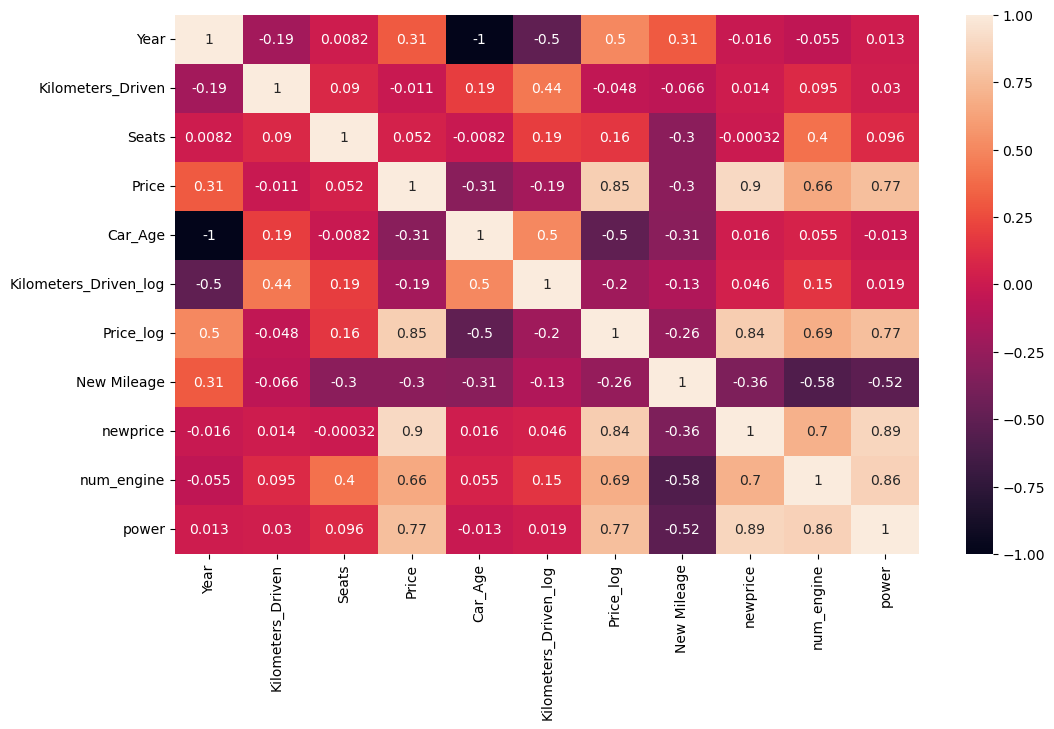

In [41]:
plt.figure(figsize=(12, 7))
sns.heatmap(data.drop(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'New_Price', 'Brand', 'Model'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

In [42]:
data.loc[data['Kilometers_Driven']==0.0, 'Kilometers_Driven']=np.nan
data.Kilometers_Driven.isnull().sum()
data['Kilometers_Driven'].fillna(value=np.mean(data['Kilometers_Driven']),inplace=True)

In [43]:
type(data['Mileage'])
#data.keys()

pandas.core.series.Series

In [44]:
#data.Seats.isnull().sum()

# This code did not run in the end and was implemented in a different way below. Since the purpose of the code was to
# replace all nan values in the respective columns with the medians of grouped columns based off of Brand and Model,
# the code was implemented in cells below through loops.

#data['Seats'].fillna(value=np.nan,inplace=True)
#data['Seats']=data.groupby(['Model','Brand'])['Seats'].apply(lambda x:x.fillna(x.median()))
#data['Engine']=data.groupby(['Model','Brand'])['Engine'].apply(lambda x:x.fillna(x.median()))
#data['Power']=data.groupby(['Model','Brand'])['Power'].apply(lambda x:x.fillna(x.median()))


TypeError: incompatible index of inserted column with frame index

In [45]:
data['Engine'].isnull().sum() # checking for null values

46

In [46]:
data['Power'].isnull().sum() # checking for null values

46

In [47]:
data['Seats'].isnull().sum()

53

In [48]:
for index, row in data.iterrows(): #inserting the median of seats in nan values based off common model and brand
    if np.isnan(row['Seats']):
        data.at[index, 'Seats'] = data.groupby(['Model','Brand'])['Seats'].median()[row['Model'],row['Brand']]

In [49]:
data['Seats'].isnull().sum()

22

In [50]:
for index, row in data.iterrows():
    if np.isnan(row['Seats']):
        data.at[index, 'Seats'] = data['Seats'].mode() #using mode to fill those values that weren't filled.

In [51]:
data['Seats'].isnull().sum()

0

In [52]:
for index, row in data.iterrows():
    if np.isnan(row['newprice']):
        data.at[index, 'newprice'] = data.groupby(['Brand'])['newprice'].median()[row['Brand']]

In [53]:
data.newprice.isnull().sum()

180

In [54]:
for index, row in data.iterrows():
    if np.isnan(row['newprice']):
        data.at[index, 'newprice'] = data['newprice'].mode()

In [55]:
data.newprice.isnull().sum()

0

In [56]:
data['num_engine'].isnull().sum()

46

In [57]:
for index, row in data.iterrows():
    if np.isnan(row['num_engine']):
        data.at[index, 'num_engine'] = data.groupby(['Brand'])['num_engine'].median()[row['Brand']]

In [58]:
data['num_engine'].isnull().sum()

0

In [59]:
data['power'].isnull().sum()

175

In [60]:
for index, row in data.iterrows():
    if np.isnan(row['power']):
        data.at[index, 'power'] = data.groupby(['Brand'])['power'].median()[row['Brand']]
        #Only Brand was used here due to the presence of a nan value at model of a brand 'OpelCorsa'

In [61]:
data['power'].isnull().sum()

2

In [62]:
for index, row in data.iterrows():
    if np.isnan(row['power']):
        data.at[index, 'power'] = data['power'].mode()

In [63]:
data['power'].isnull().sum()

0

In [64]:
data.to_csv('edited_data.csv')